In [112]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
#loading the dataset
train=pd.read_csv('../input/predict-demand/train.csv')
test=pd.read_csv('../input/predict-demand/test.csv')

In [114]:
train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#getting information about the tail 
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
#All values after row 6479 are NaN.
train=train.drop(train.index[6480:])


In [117]:
#checking the null value in each column
train.isna().sum()

id            0
date          0
city          0
lat          51
long         46
pop           0
shop          0
brand         0
container    16
capacity     15
price         0
quantity      0
dtype: int64

In [118]:
train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0


In [119]:
#grouping by dataset 
pd.DataFrame(train.groupby(['brand','container'],axis=0,as_index=True).count()['id'])

id
brand        container     
adult-cola   can        430
             glass      432
             plastic    432
gazoza       can        431
             glass      429
             plastic    431
kinder-cola  can        431
             glass      431
             plastic    432
lemon-boost  can        431
             glass      432
             plastic    431
orange-power can        430
             glass      430
             plastic    431

In [120]:
gazoza_train=train[train['brand']=='gazoza'].reset_index(drop=True)

In [121]:
gazoza_train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,7.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,glass,500ml,0.49,44734.0
1,17.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,glass,500ml,0.58,41378.0
2,18.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,plastic,1.5lt,1.00,30757.0
3,19.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,can,330ml,0.26,49688.0
4,31.0,31/01/12,Patra,38.24444,21.73444,164250.0,shop_6,gazoza,glass,500ml,0.57,56428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,6456.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,glass,500ml,0.70,38691.0
1292,6457.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,can,330ml,0.36,33818.0
1293,6467.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,plastic,1.5lt,1.48,28441.0
1294,6473.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,plastic,1.5lt,0.26,46047.0


In [122]:
container_missing=gazoza_train[gazoza_train['container'].isna()]

In [123]:
container_missing

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
340,1694.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,NaN,330ml,0.36,37603.0
798,3995.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,NaN,500ml,0.73,53633.0
984,4927.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,NaN,500ml,0.64,46809.0
1214,6074.0,31/08/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,NaN,1.5lt,1.38,35339.0
1229,6155.0,30/09/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,NaN,500ml,0.65,76651.0


In [124]:
#filling the missing value at container column
gazoza_train.at[340,'container']='can'
gazoza_train.at[798,'container']='glass'
gazoza_train.at[984,'container']='glass'
gazoza_train.at[1214,'container']='plastic'
gazoza_train.at[1229,'container']='glass'

In [125]:
container_missing

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
340,1694.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,NaN,330ml,0.36,37603.0
798,3995.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,NaN,500ml,0.73,53633.0
984,4927.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,NaN,500ml,0.64,46809.0
1214,6074.0,31/08/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,NaN,1.5lt,1.38,35339.0
1229,6155.0,30/09/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,NaN,500ml,0.65,76651.0


In [126]:
gazoza_train[gazoza_train['container'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity


In [127]:
capacity_missing=gazoza_train[gazoza_train['capacity'].isna()]

In [128]:
capacity_missing

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
368,1847.0,30/09/13,Thessaloniki,40.64361,22.93086,347001.0,shop_4,gazoza,plastic,NaN,0.93,42320.0
648,3246.0,31/01/15,Athens,37.97945,23.71622,667237.0,shop_1,gazoza,glass,NaN,0.51,46809.0
962,4812.0,30/06/16,Thessaloniki,40.64361,22.93086,351702.0,shop_4,gazoza,glass,NaN,0.77,40645.0


In [129]:
gazoza_train.at[368,'capacity']='1.51t'
gazoza_train.at[648,'capacity']='500ml'
gazoza_train.at[962,'capacity']='500ml'

In [130]:
gazoza_train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,7.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,glass,500ml,0.49,44734.0
1,17.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,glass,500ml,0.58,41378.0
2,18.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,plastic,1.5lt,1.00,30757.0
3,19.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,can,330ml,0.26,49688.0
4,31.0,31/01/12,Patra,38.24444,21.73444,164250.0,shop_6,gazoza,glass,500ml,0.57,56428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,6456.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,glass,500ml,0.70,38691.0
1292,6457.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,can,330ml,0.36,33818.0
1293,6467.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,plastic,1.5lt,1.48,28441.0
1294,6473.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,plastic,1.5lt,0.26,46047.0


In [131]:
#checking for na value
gazoza_train[gazoza_train['capacity'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity


In [132]:
#converting date column to datetime
gazoza_train['date']=pd.to_datetime(gazoza_train['date'])

In [133]:
gazoza_train['date']

0      2012-01-31
1      2012-01-31
2      2012-01-31
3      2012-01-31
4      2012-01-31
          ...    
1291   2017-12-31
1292   2017-12-31
1293   2017-12-31
1294   2017-12-31
1295   2017-12-31
Name: date, Length: 1296, dtype: datetime64[ns]

In [134]:
gazoza_train['capacity']

0       500ml
1       500ml
2       1.5lt
3       330ml
4       500ml
        ...  
1291    500ml
1292    330ml
1293    1.5lt
1294    1.5lt
1295    1.5lt
Name: capacity, Length: 1296, dtype: object

In [135]:
#removing the suffix
gazoza_train['capacity']=gazoza_train['capacity'].map(lambda x:str(x[:-2]))

In [136]:
gazoza_train['capacity']

0       500
1       500
2       1.5
3       330
4       500
       ... 
1291    500
1292    330
1293    1.5
1294    1.5
1295    1.5
Name: capacity, Length: 1296, dtype: object

In [137]:
#converting 'capacity' column to numeric
gazoza_train['capacity']=pd.to_numeric(gazoza_train['capacity'])

In [138]:
gazoza_test=test[test['brand']=='gazoza'].reset_index(drop=True)

In [139]:
gazoza_test

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6485,31/01/18,Athens,37.97945,23.71622,664046,shop_1,gazoza,glass,500ml,0.77,24297
1,6486,31/01/18,Athens,37.97945,23.71622,664046,shop_1,gazoza,plastic,1.5lt,1.22,21295
2,6487,31/01/18,Athens,37.97945,23.71622,664046,shop_1,gazoza,can,330ml,0.28,38107
3,6496,31/01/18,Irakleion,35.32787,25.14341,137154,shop_2,gazoza,plastic,1.5lt,1.27,26491
4,6508,31/01/18,Patra,38.24444,21.73444,168034,shop_6,gazoza,plastic,1.5lt,1.43,25790
...,...,...,...,...,...,...,...,...,...,...,...,...
211,7527,31/12/18,Athens,37.96245,23.68708,664046,shop_3,gazoza,can,330ml,0.44,22206
212,7536,31/12/18,Larisa,39.63689,22.41761,144651,shop_5,gazoza,glass,500ml,0.66,45724
213,7537,31/12/18,Larisa,39.63689,22.41761,144651,shop_5,gazoza,plastic,1.5lt,1.25,22136
214,7538,31/12/18,Larisa,39.63689,22.41761,144651,shop_5,gazoza,can,330ml,0.31,43512


In [142]:
gazoza_test[gazoza_test['capacity'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
208,7514,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,gazoza,can,NaN,0.39,54365
209,7525,31/12/18,Athens,37.96245,23.68708,664046,shop_3,gazoza,glass,NaN,0.57,33174


In [143]:
gazoza_test.at[208,'capacity']='330ml'
gazoza_test.at[209,'capacity']='500ml'

In [144]:
gazoza_test[gazoza_test['capacity'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity


In [147]:
#converting date to datetime object
gazoza_test['date']=pd.to_datetime(gazoza_test['date'])

In [151]:
gazoza_test['capacity']=gazoza_test['capacity'].map(lambda x:str(x)[:-2])

In [152]:
#converting capacity column to numeric
gazoza_test['capacity']=pd.to_numeric(gazoza_test['capacity'])

In [153]:
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        213 non-null    float64       
 4   long       211 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


In [154]:
gazoza_train.isna().sum()

id            0
date          0
city          0
lat          11
long          4
pop           0
shop          0
brand         0
container     0
capacity      0
price         0
quantity      0
dtype: int64

In [155]:
gazoza_train=gazoza_train.dropna(axis=0)

In [156]:
gazoza_train.isna().sum()

id           0
date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [157]:
gazoza_test.isna().sum()

id           0
date         0
city         0
lat          3
long         5
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [159]:
gazoza_test=gazoza_test.dropna(axis=0)

In [160]:
gazoza_test.isna().sum()

id           0
date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

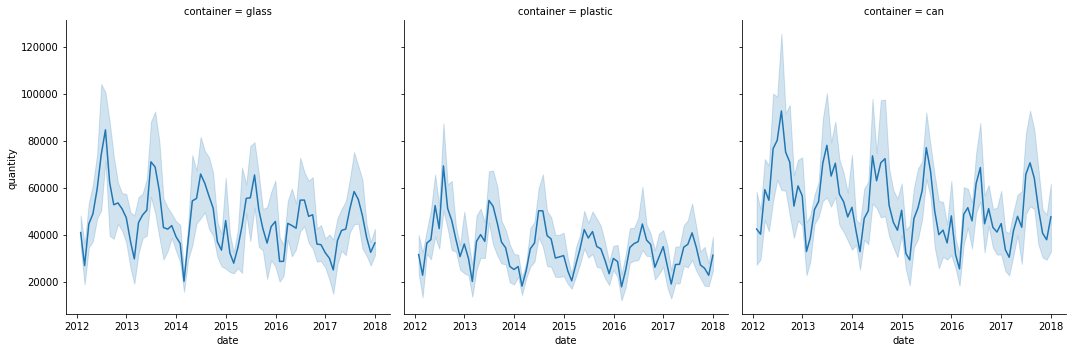

In [163]:
#using relplot aggregate and give graphical representation of the data 
sns.relplot(data=gazoza_train,x='date',y='quantity',col='container',kind='line')

In [162]:
gazoza_train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,7.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,glass,500.0,0.49,44734.0
1,17.0,2012-01-31,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,glass,500.0,0.58,41378.0
2,18.0,2012-01-31,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,plastic,1.5,1.00,30757.0
3,19.0,2012-01-31,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,can,330.0,0.26,49688.0
4,31.0,2012-01-31,Patra,38.24444,21.73444,164250.0,shop_6,gazoza,glass,500.0,0.57,56428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,6456.0,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,glass,500.0,0.70,38691.0
1292,6457.0,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,can,330.0,0.36,33818.0
1293,6467.0,2017-12-31,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,plastic,1.5,1.48,28441.0
1294,6473.0,2017-12-31,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,plastic,1.5,0.26,46047.0


In [169]:
#filtering dataset based on two criteria
athens_onefive=gazoza_train[(gazoza_train['city']=='Athens')&(gazoza_train['capacity']==1.5)]

In [170]:
athens_onefive

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
9,55.0,2012-01-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,1.16,14480.0
17,86.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,0.85,26884.0
19,97.0,2012-02-29,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,1.35,7946.0
26,143.0,2012-02-29,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.98,14749.0
46,235.0,2012-03-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.45,33115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,6294.0,2017-10-31,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.45,14238.0
1261,6309.0,2017-11-30,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,19973.0
1270,6356.0,2017-11-30,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.40,15525.0
1279,6399.0,2017-12-31,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,22911.0


In [174]:
#using groupby to summing the quantity based on date 
#mean on each day how many quantity has sold
quantity_sold_per_date=pd.DataFrame(gazoza_train.groupby(['date'],axis=0,as_index=True).sum()['quantity'])

In [175]:
quantity_sold_per_date

,quantity
date,
2012-01-31,687831.0
2012-02-29,537459.0
2012-03-31,839640.0
2012-04-30,792704.0
2012-05-31,1129367.0
...,...
2017-08-31,921181.0
2017-09-30,731018.0
2017-10-31,629550.0


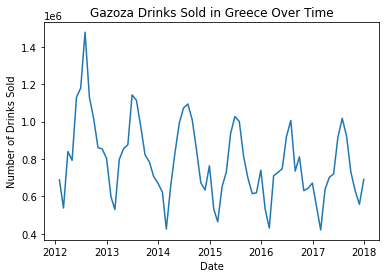

In [176]:
plt.xlabel('Date')
plt.ylabel('Number of Drinks Sold')
plt.title('Gazoza Drinks Sold in Greece Over Time')
plt.plot(quantity_sold_per_date)

In [178]:
#Determine rolling statistics
rolmean=quantity_sold_per_date.rolling(window=4).mean()

In [179]:
rolmean

,quantity
date,
2012-01-31,NaN
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,714408.50
2012-05-31,824792.50
...,...
2017-08-31,893293.75
2017-09-30,895985.50
2017-10-31,824731.75


In [180]:
rolstd=quantity_sold_per_date.rolling(window=4).std()

In [181]:
rolstd

,quantity
date,
2012-01-31,NaN
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,133953.478204
2012-05-31,242608.248253
...,...
2017-08-31,124527.460847
2017-09-30,119557.390895
2017-10-31,176272.704861


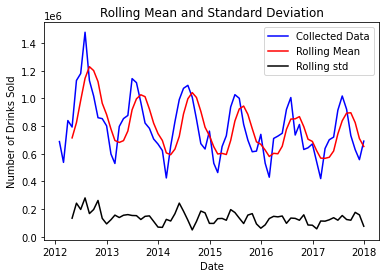

In [182]:
#Plotting rolling statistics

orig=plt.plot(quantity_sold_per_date,color='blue',label='Collected Data')
meanR=plt.plot(rolmean,color='red',label='Rolling Mean')
stdR=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Number of Drinks Sold')
plt.show(block=False)









In [185]:
from statsmodels.tsa.stattools import adfuller
def dickeyfuller(timeseries):
    print('Results of Dickey-Fuller Test;')
    dftest=adfuller(timeseries[:],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic',
                      'p-value','#Lags Used','Number of 0 bsservations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
        

In [186]:
dickeyfuller(quantity_sold_per_date)

Results of Dickey-Fuller Test;
Test Statistic                   -3.040768
p-value                           0.031259
#Lags Used                       11.000000
Number of 0 bsservations Used    60.000000
Critical Value (1%)              -3.544369
Critical Value (5%)              -2.911073
Critical Value (10%)             -2.593190
dtype: float64


Text(0.5, 1.0, 'Log Scale Gazoza Drinks Sold in Greece Over Time')

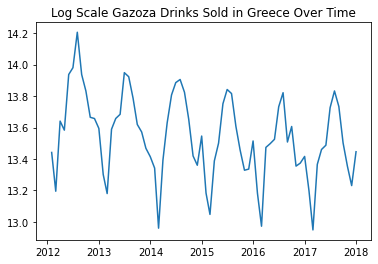

In [187]:
qty_log=np.log(quantity_sold_per_date)
plt.plot(qty_log)
plt.title('Log Scale Gazoza Drinks Sold in Greece Over Time')

In [188]:
dickeyfuller(qty_log)

Results of Dickey-Fuller Test;
Test Statistic                   -2.593706
p-value                           0.094305
#Lags Used                       11.000000
Number of 0 bsservations Used    60.000000
Critical Value (1%)              -3.544369
Critical Value (5%)              -2.911073
Critical Value (10%)             -2.593190
dtype: float64


In [189]:
#Determining rolling statistics
rolmean_log=qty_log.rolling(window=4).mean()

In [190]:
rolmean_log

,quantity
date,
2012-01-31,NaN
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,13.464960
2012-05-31,13.588927
...,...
2017-08-31,13.694878
2017-09-30,13.698588
2017-10-31,13.605227
